In [1]:
from pandas import *
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from numpy import *
import warnings
warnings.filterwarnings('ignore') 

### Importing the all the required data

In [2]:
nyse_dat= read_csv('TTM-2010-2022.csv')                                # TATAMOTORS ADR stock Data
nse_dat= read_csv('TATAMOTORS.NS-2010-2022.csv')                       # TATAMOTORS NSE stock Data
nyse_index=read_csv('NYSE Composite.csv')                              # NYSE Composite Index Data
nse_index=read_csv('^NSEI.csv')                                        # NSE Index Data
nse_index=nse_index.dropna()                                           # Dropping NaN values
nyse_index=nyse_index.drop(['Unnamed: 0','Adj Close','Volume'],axis=1) # Dropping Adjusted close,Volume and unrelated columns 
nse_index=nse_index.drop(['Adj Close','Volume'],axis=1)                # Dropping Adjusted close, Volume
nse_dat=nse_dat.drop(['Adj Close'],axis=1)                             # Dropping Adjusted close of TATAMOTORS NSE
nyse_dat=nyse_dat.drop(['Adj Close'],axis=1)                           # Dropping Adjusted close of TATAMOTORS NYSE

In [3]:
nse_dat['Date']=nse_dat['Date'].astype('datetime64') 
# The date format of nse was different in original csv file so, the date column is converted to datetime format data to manipulate,
# the format.

In [4]:
nse_dat['Date']=nse_dat['Date'].dt.strftime('%Y-%m-%d')
# Converting the date into the required format

### Considering only the dates on which both the NSE and NYSE were open, the reason being, lesser the time difference between the markets, trend following is more significant as the probability of other factors coming out, which impact stock price is minimum. In this particular case it is only 3-4 hours difference.

In [5]:
nyse_nse_price=merge(nse_dat,nyse_dat,on='Date')     # merging the ADR and NSE stock price dataframes by using common dates as key
nyse_nse_index=merge(nse_index,nyse_index,on='Date') # merging the ADR and NSE index dataframes by using common dates as key

In [6]:
complete_dat=merge(nyse_nse_price,nyse_nse_index,on='Date') # merging the above two index and stock price dataframes using common dates
complete_dat=complete_dat.dropna()                          # dropping if there are any NaN values

In [7]:
# When 'merge' function is used, the column names in the dataframe change so, it is renamed as below 
complete_dat=complete_dat.rename(columns={"Open_x_x":"TM NSE open","High_x_x":"TM NSE high","Low_x_x":"TM NSE low","Close_x_x":"TM NSE close","Volume_x":"TM NSE Volume","Open_y_x":"TM NYSE open","High_y_x":"TM NYSE high","Low_y_x":"TM NYSE low","Close_y_x":"TM NYSE close","Volume_y":"TM NYSE Volume","Open_x_y":'NYSE index open',"High_x_y":'NYSE index high',"Low_x_y":'NYSE index low',"Close_x_y":'NYSE index close',"Open_y_y":'NSE index open',"High_y_y":'NSE index high',"Low_y_y":'NSE index low',"Close_y_y":'NSE index close'})

In [93]:
complete_dat.head(10) # Displaying the data

Date  TM NSE open  TM NSE high  TM NSE low  TM NSE close  \
0  2010-01-04   156.303482   164.040497  156.184769    163.535919   
1  2010-01-05   162.259598   167.147186  153.246277    160.686478   
2  2010-01-06   162.200241   162.932388  159.311234    160.933823   
3  2010-01-07   161.171280   161.923218  154.344498    155.432831   
4  2010-01-08   156.323273   159.251862  155.343781    156.283707   
5  2010-01-11   158.104172   158.104172  154.789719    156.352951   
6  2010-01-12   155.927521   157.708420  154.552277    155.591125   
7  2010-01-13   155.333893   157.193939  152.781265    155.323990   
8  2010-01-14   155.531769   156.778397  154.255447    154.769943   
9  2010-01-15   154.938126   158.994629  153.355118    157.748001   

   TM NSE Volume  TM NYSE open  TM NYSE high  TM NYSE low  TM NYSE close  ...  \
0       27906448     17.570000     18.090000    17.490000      18.030001  ...   
1       23669317     17.780001     17.900000    17.620001      17.850000  ...   
2       14990820     17.900000     18.010000    17.770000      17.990000  ...   
3       22722030     17.389999     17.629999    17.340000      17.570000  ...   
4       16495776     17.559999     17.559999    17.370001      17.400000  ...   
5       11776347     17.750000     17.750000    17.280001      17.370001  ...   
6       10657130     17.150000     17.309999    16.889999      16.980000  ...   
7       17659374     17.180000     17.440001    17.120001      17.400000  ...   
8        8626217     17.469999     17.600000    17.219999      17.530001  ...   
9       18955837     17.570000     17.730000    17.100000      17.340000  ...   

   NYSE index close  NSE index open  NSE index high  NSE index low  \
0       5232.200195     7184.979980     7331.120117    7184.979980   
1       5277.899902     7326.740234     7359.459961    7313.600098   
2       5281.799805     7354.850098     7389.279785    7342.490234   
3       5263.100098     7377.700195     7398.209961    7325.509766   
4       5244.750000     7393.930176     7426.410156    7367.810059   
5       5249.399902     7425.609863     7471.310059    7419.569824   
6       5210.399902     7449.049805     7449.049805    7340.939941   
7       5233.950195     7370.470215     7441.180176    7349.419922   
8       5259.899902     7430.140137     7458.160156    7417.950195   
9       5252.200195     7448.509766     7448.509766    7326.540039   

   NSE index close  TM NSE delta %  TM NYSE delta %  Day P&L %  \
0      7326.740234        4.627176         2.618105   2.618105   
1      7354.870117       -0.969508         0.393695  -0.393695   
2      7377.700195       -0.780774         0.502793  -0.502793   
3      7393.930176       -3.560466         1.035083  -1.035083   
4      7425.350098       -0.025310        -0.911156   0.911156   
5      7449.049805       -1.107637        -2.140839   2.140839   
6      7370.450195       -0.215739        -0.991254   0.991254   
7      7430.140137       -0.006375         1.280559  -1.280559   
8      7448.520020       -0.489820         0.343457  -0.343457   
9      7356.790039        1.813547        -1.309050  -1.309050   

   Daily short P&L %  Daily long P&L %  
0          -2.618105          2.618105  
1          -0.393695          0.393695  
2          -0.502793          0.502793  
3          -1.035083          1.035083  
4           0.911156         -0.911156  
5           2.140839         -2.140839  
6           0.991254         -0.991254  
7          -1.280559          1.280559  
8          -0.343457          0.343457  
9           1.309050         -1.309050  

[10 rows x 24 columns]

In [84]:
price_dat1=complete_dat

### Creating pairplots NSE, ADR and NYSE ,NSE index prices

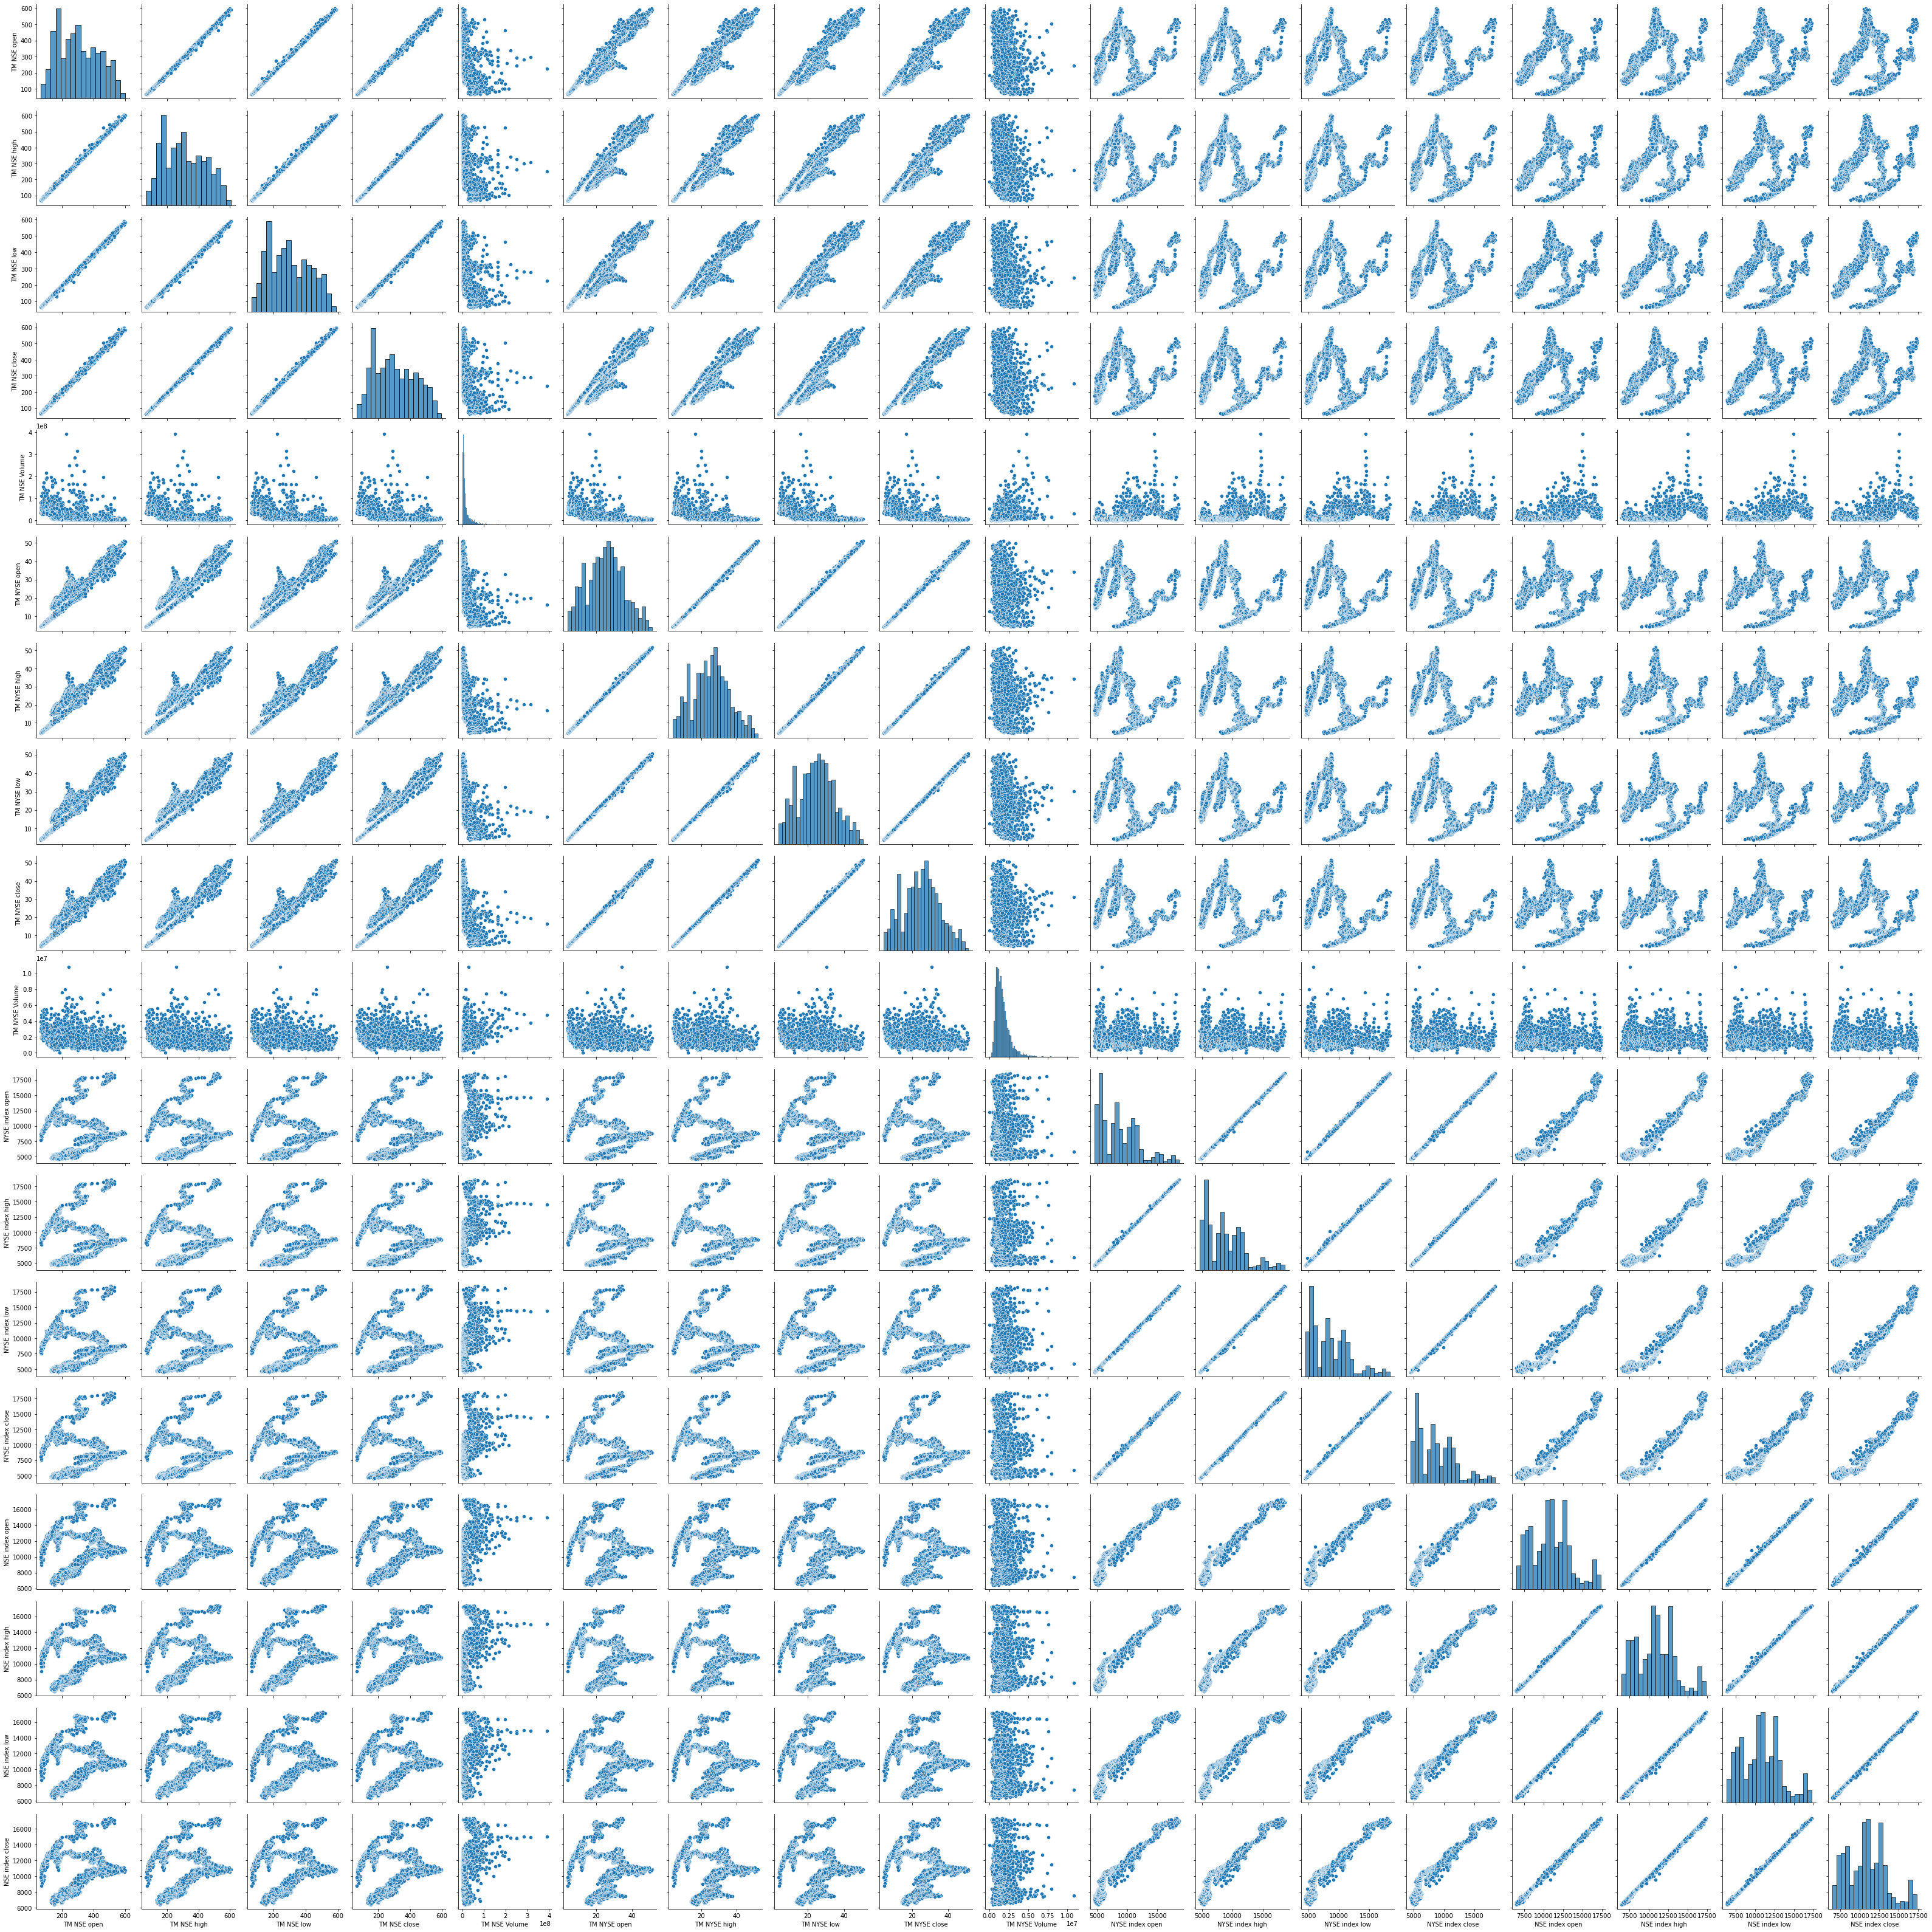

In [11]:
sns.pairplot(price_dat.iloc[:,1:]);

### The Correlation heatmap

<AxesSubplot:>

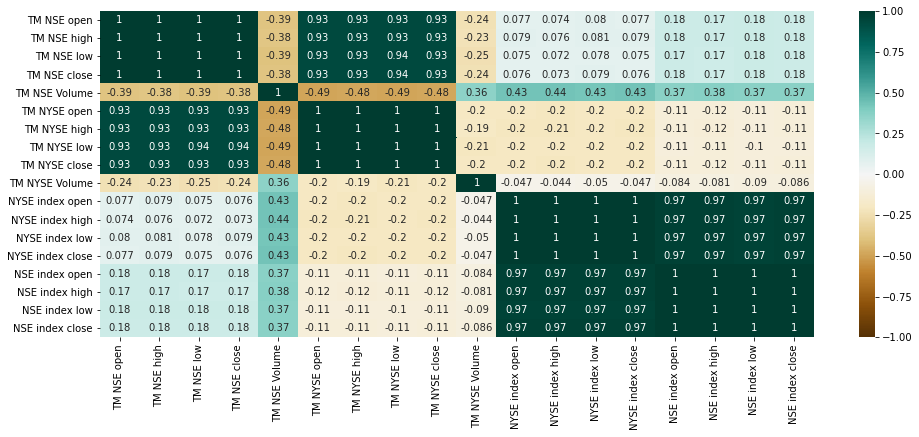

In [12]:
plt.figure(figsize=(16, 6))
sns.heatmap(price_dat1.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')

#### From the above correlation matrix, it is clear that the correlation between the stock price of NSE and ADR are very high that are around 0.93

### The covariance matrix 

<AxesSubplot:>

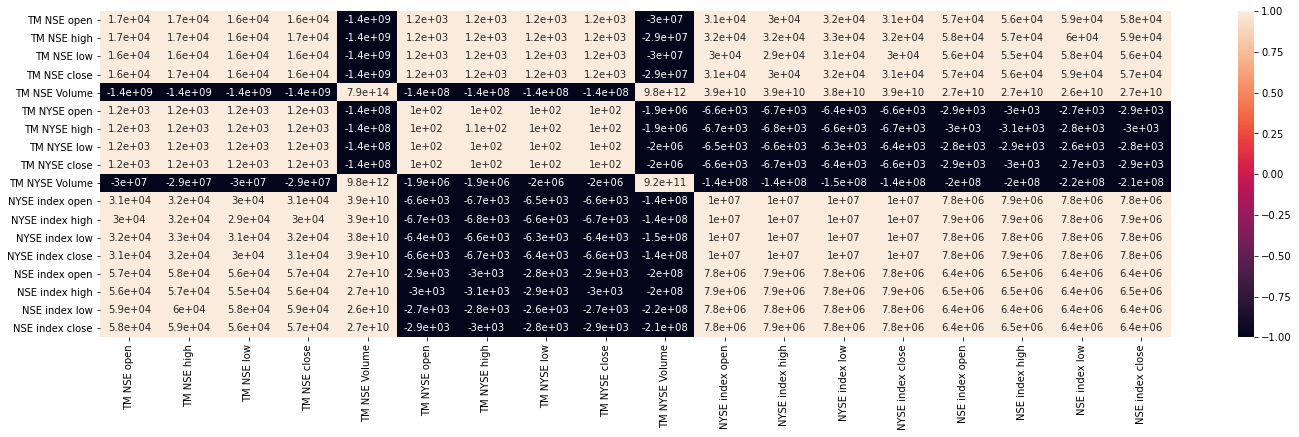

In [13]:
plt.figure(figsize=(24, 6))
sns.heatmap(price_dat1.cov(),vmin=-1,vmax=1,annot=True)

### Standardizing the data for models

In [14]:
# Using Sklearn , Standard scalar module
scaler=StandardScaler()
scaled_dat=scaler.fit(price_dat.iloc[:,1:])
transformed_dat=scaler.transform(price_dat.iloc[:,1:])

In [15]:
price_dat_scaled=DataFrame(price_dat['Date'],columns=['Date']) # Creating a dataframe for standardized values

In [16]:
transformed_frame=DataFrame(transformed_dat,columns=['TM NSE open-s' ,'TM NSE high-s' ,'TM NSE low-s' ,'TM NSE close-s' ,'TM NSE Volume-s' ,'TM NYSE open-s' ,'TM NYSE high-s' ,'TM NYSE low-s' ,'TM NYSE close-s' ,'TM NYSE Volume-s' ,'NYSE index open-s' ,'NYSE index high-s' ,'NYSE index low-s' ,'NYSE index close-s' ,'NSE index open-s', 'NSE index high-s' ,'NSE index low-s' ,'NSE index close-s'])

In [86]:
price_dat_transformed=merge(price_dat_scaled,transformed_frame,left_index=True,right_index=True) # merging all the standardized values with date column

In [92]:
price_dat_transformed.head(10)

Date  TM NSE open-s  TM NSE high-s  TM NSE low-s  TM NSE close-s  \
0  2010-01-04      -1.159984      -1.124930     -1.135013       -1.102540   
1  2010-01-05      -1.113610      -1.100957     -1.158159       -1.124772   
2  2010-01-06      -1.114073      -1.133480     -1.110386       -1.122842   
3  2010-01-07      -1.122084      -1.141267     -1.149509       -1.165763   
4  2010-01-08      -1.159830      -1.161880     -1.141637       -1.159124   
5  2010-01-11      -1.145964      -1.170736     -1.146002       -1.158584   
6  2010-01-12      -1.162911      -1.173790     -1.147872       -1.164528   
7  2010-01-13      -1.167533      -1.177760     -1.161822       -1.166612   
8  2010-01-14      -1.165992      -1.180966     -1.150210       -1.170935   
9  2010-01-15      -1.170614      -1.163865     -1.157302       -1.147699   

   TM NSE Volume-s  TM NYSE open-s  TM NYSE high-s  TM NYSE low-s  \
0         0.244961       -0.740802       -0.709562      -0.727757   
1         0.094477       -0.720231       -0.728037      -0.714914   
2        -0.213745       -0.708476       -0.717341      -0.700096   
3         0.060833       -0.758435       -0.754291      -0.742575   
4        -0.160296       -0.741782       -0.761098      -0.739611   
5        -0.327909       -0.723170       -0.742623      -0.748502   
6        -0.367659       -0.781945       -0.785408      -0.787029   
7        -0.118970       -0.779006       -0.772767      -0.764308   
8        -0.439788       -0.750598       -0.757208      -0.754429   
9        -0.072925       -0.740802       -0.744567      -0.766284   

   TM NYSE close-s  TM NYSE Volume-s  NYSE index open-s  NYSE index high-s  \
0        -0.695931          0.450984          -1.112701          -1.111617   
1        -0.713582          0.326855          -1.088753          -1.095993   
2        -0.699853          0.363615          -1.088439          -1.088947   
3        -0.741038          1.039450          -1.087293          -1.091546   
4        -0.757708          0.269268          -1.092805          -1.099625   
5        -0.760650         -0.749587          -1.092946          -1.096353   
6        -0.798893         -0.658052          -1.096935          -1.092188   
7        -0.757708         -0.782285          -1.109027          -1.111382   
8        -0.744960         -0.294309          -1.102148          -1.100846   
9        -0.763592         -0.432809          -1.094171          -1.098654   

   NYSE index low-s  NYSE index close-s  NSE index open-s  NSE index high-s  \
0         -1.111160           -1.102016         -1.456344         -1.416142   
1         -1.087362           -1.087644         -1.400472         -1.404997   
2         -1.081784           -1.086417         -1.389393         -1.393269   
3         -1.086620           -1.092298         -1.380387         -1.389757   
4         -1.089796           -1.098069         -1.373990         -1.378666   
5         -1.091976           -1.096607         -1.361505         -1.361008   
6         -1.100462           -1.108872         -1.352266         -1.369762   
7         -1.110385           -1.101465         -1.383237         -1.372857   
8         -1.090491           -1.093304         -1.359719         -1.366180   
9         -1.087346           -1.095726         -1.352479         -1.369975   

   NSE index low-s  NSE index close-s  
0        -1.434560          -1.399824  
1        -1.383827          -1.388743  
2        -1.372431          -1.379750  
3        -1.379129          -1.373357  
4        -1.362444          -1.360981  
5        -1.342027          -1.351645  
6        -1.373043          -1.382606  
7        -1.369698          -1.359094  
8        -1.342666          -1.351854  
9        -1.378723          -1.387987

### Plotting histograms of stock prices TM NSE

In [19]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 7))
ax=sns.histplot(price_dat['TM NSE open'],ax=axes[0][0])
ax.set(title='TM NSE Open')

ax1=sns.histplot(price_dat['TM NSE high'],ax=axes[0][1])
ax1.set(title='TM NSE High')

ax2=sns.histplot(price_dat['TM NSE low'],ax=axes[1][0])
ax2.set(title='TM NSE Low')

ax3=sns.histplot(price_dat['TM NSE close'],ax=axes[1][1])
ax3.set(title='TM NSE Close')

[Text(0.5, 1.0, 'TM NSE Close')]

### Plotting histograms of stock prices TM NYSE

[Text(0.5, 1.0, 'TM NYSE Close')]

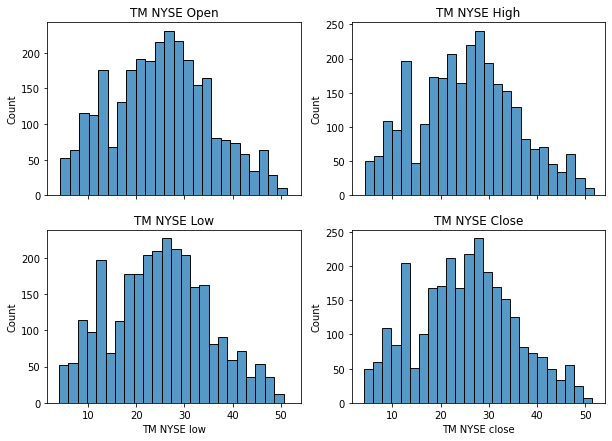

In [20]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 7))
ax=sns.histplot(price_dat['TM NYSE open'],ax=axes[0][0])
ax.set(title='TM NYSE Open')

ax1=sns.histplot(price_dat['TM NYSE high'],ax=axes[0][1])
ax1.set(title='TM NYSE High')

ax2=sns.histplot(price_dat['TM NYSE low'],ax=axes[1][0])
ax2.set(title='TM NYSE Low')

ax3=sns.histplot(price_dat['TM NYSE close'],ax=axes[1][1])
ax3.set(title='TM NYSE Close')

[Text(0.5, 1.0, 'TM NSE Close')]

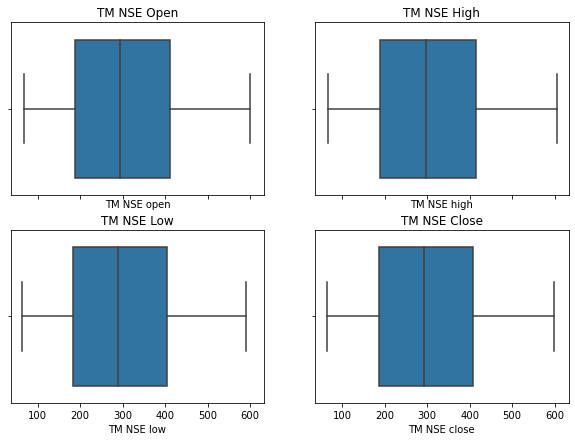

In [21]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 7))
ax=sns.boxplot(price_dat['TM NSE open'],ax=axes[0][0])
ax.set(title='TM NSE Open')

ax1=sns.boxplot(price_dat['TM NSE high'],ax=axes[0][1])
ax1.set(title='TM NSE High')

ax2=sns.boxplot(price_dat['TM NSE low'],ax=axes[1][0])
ax2.set(title='TM NSE Low')

ax3=sns.boxplot(price_dat['TM NSE close'],ax=axes[1][1])
ax3.set(title='TM NSE Close')

In [22]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 7))
ax=sns.boxplot(price_dat['TM NYSE open'],ax=axes[0][0])
ax.set(title='TM NYSE Open')

ax1=sns.boxplot(price_dat['TM NYSE high'],ax=axes[0][1])
ax1.set(title='TM NYSE High')

ax2=sns.boxplot(price_dat['TM NYSE low'],ax=axes[1][0])
ax2.set(title='TM NYSE Low')

ax3=sns.boxplot(price_dat['TM NYSE close'],ax=axes[1][1])
ax3.set(title='TM NYSE Close')

[Text(0.5, 1.0, 'TM NYSE Close')]

### Computing the % change in the stock price per day at NSE and NYSE

In [23]:
nse=array(((price_dat['TM NSE close']-price_dat['TM NSE open'])/price_dat['TM NSE open'])*100) # This change is % change in the stock price with respect to open price at nse  
nyse= array(((price_dat['TM NYSE close']-price_dat['TM NYSE open'])/price_dat['TM NYSE open'])*100) # This change is % change in the stock price with respect to open price at nyse

### Including the above % change in the new columns in the price_dat1 Dataframe

In [24]:
price_dat1['TM NSE delta %']=nse  
price_dat1['TM NYSE delta %']=nyse

### Getting the indicies of the values , that gave profits and losses according to the strategy

In [25]:
ind=where(nyse/nse>0) # Same sign indicates that the price trend on nyse and nse were same
ind_n=where(nyse/nse<0) # Same sign indicates that the price trend on nyse and nse were different

### Summing up the percentages of price changes that gave profits 

In [26]:
return_prof=sum(abs(nyse[ind]))

### Summing up the percentages of price changes that gave losses 

In [27]:
return_loss=sum(abs(nyse[ind_n]))

### Difference between the accumulated profit % and loss %

In [28]:
return_prof-return_loss

627.2900595598721

In [80]:
gtz_nyse=nyse[ind] # Array of % changes in price of the stock on a day that contributed for profits

In [81]:
ltz_nyse=nyse[ind_n] # Array of % changes in price of the stock on a day that contributed for losses

### Histogram of % change in stock price per day vs number of times that change was repeated in 12 years

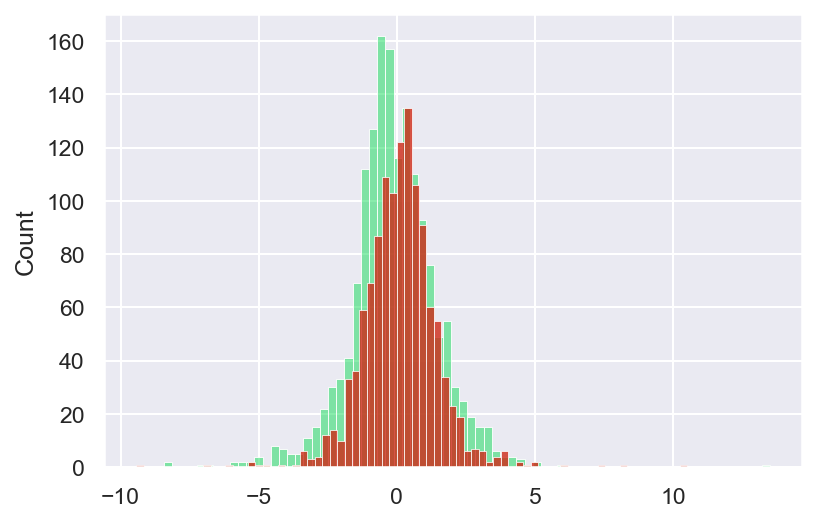

In [82]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':300})
sns.histplot(gtz_nyse,alpha=0.5,color='#12db58'); # Number of times a particular of change in the stock price contributed for profits 
sns.histplot(ltz_nyse,alpha=0.8,color='#cf2917'); # Number of times a particular of change in the stock price contributed for losses

In [88]:
# Tabulating the % change for three different strategies
price_dat1['Day P&L %']=(price_dat1['TM NYSE delta %']/price_dat1['TM NSE delta %'])*abs(price_dat1['TM NSE delta %'])
price_dat1['Daily short P&L %']=-1*(price_dat1['TM NYSE delta %'])
price_dat1['Daily long P&L %']=(price_dat1['TM NYSE delta %'])

In [91]:
price_dat1=price_dat1.dropna()
price_dat1.head(10)

Date  TM NSE open  TM NSE high  TM NSE low  TM NSE close  \
0  2010-01-04   156.303482   164.040497  156.184769    163.535919   
1  2010-01-05   162.259598   167.147186  153.246277    160.686478   
2  2010-01-06   162.200241   162.932388  159.311234    160.933823   
3  2010-01-07   161.171280   161.923218  154.344498    155.432831   
4  2010-01-08   156.323273   159.251862  155.343781    156.283707   
5  2010-01-11   158.104172   158.104172  154.789719    156.352951   
6  2010-01-12   155.927521   157.708420  154.552277    155.591125   
7  2010-01-13   155.333893   157.193939  152.781265    155.323990   
8  2010-01-14   155.531769   156.778397  154.255447    154.769943   
9  2010-01-15   154.938126   158.994629  153.355118    157.748001   

   TM NSE Volume  TM NYSE open  TM NYSE high  TM NYSE low  TM NYSE close  ...  \
0       27906448     17.570000     18.090000    17.490000      18.030001  ...   
1       23669317     17.780001     17.900000    17.620001      17.850000  ...   
2       14990820     17.900000     18.010000    17.770000      17.990000  ...   
3       22722030     17.389999     17.629999    17.340000      17.570000  ...   
4       16495776     17.559999     17.559999    17.370001      17.400000  ...   
5       11776347     17.750000     17.750000    17.280001      17.370001  ...   
6       10657130     17.150000     17.309999    16.889999      16.980000  ...   
7       17659374     17.180000     17.440001    17.120001      17.400000  ...   
8        8626217     17.469999     17.600000    17.219999      17.530001  ...   
9       18955837     17.570000     17.730000    17.100000      17.340000  ...   

   NYSE index close  NSE index open  NSE index high  NSE index low  \
0       5232.200195     7184.979980     7331.120117    7184.979980   
1       5277.899902     7326.740234     7359.459961    7313.600098   
2       5281.799805     7354.850098     7389.279785    7342.490234   
3       5263.100098     7377.700195     7398.209961    7325.509766   
4       5244.750000     7393.930176     7426.410156    7367.810059   
5       5249.399902     7425.609863     7471.310059    7419.569824   
6       5210.399902     7449.049805     7449.049805    7340.939941   
7       5233.950195     7370.470215     7441.180176    7349.419922   
8       5259.899902     7430.140137     7458.160156    7417.950195   
9       5252.200195     7448.509766     7448.509766    7326.540039   

   NSE index close  TM NSE delta %  TM NYSE delta %  Day P&L %  \
0      7326.740234        4.627176         2.618105   2.618105   
1      7354.870117       -0.969508         0.393695  -0.393695   
2      7377.700195       -0.780774         0.502793  -0.502793   
3      7393.930176       -3.560466         1.035083  -1.035083   
4      7425.350098       -0.025310        -0.911156   0.911156   
5      7449.049805       -1.107637        -2.140839   2.140839   
6      7370.450195       -0.215739        -0.991254   0.991254   
7      7430.140137       -0.006375         1.280559  -1.280559   
8      7448.520020       -0.489820         0.343457  -0.343457   
9      7356.790039        1.813547        -1.309050  -1.309050   

   Daily short P&L %  Daily long P&L %  
0          -2.618105          2.618105  
1          -0.393695          0.393695  
2          -0.502793          0.502793  
3          -1.035083          1.035083  
4           0.911156         -0.911156  
5           2.140839         -2.140839  
6           0.991254         -0.991254  
7          -1.280559          1.280559  
8          -0.343457          0.343457  
9           1.309050         -1.309050  

[10 rows x 24 columns]

In [46]:
sum((-1*(price_dat1['Daily short P&L %'])))
sum((price_dat1['Daily short P&L %']))
sum(price_dat1['Day P&L %'])

626.4495546085809

### A function to calculate cumulative return

In [102]:
# Cumulative return for trend following strategy
def cumulative_return(capital):
    comp=[]
    open_price=array(price_dat1['TM NYSE open'])
    day_pl=array(price_dat1['Day P&L %'])
    for i in range(0,len(price_dat1)):
        capital=(((capital//open_price[i])*open_price[i])*(1+(day_pl[i]/100)))+((capital-(capital//open_price[i])*open_price[i]))-0.0005*capital
        comp.append(capital)
    return comp

In [113]:
# Cumulative return for blind buying strategy
def cumulative_return_buy(capital):
    global init_cap
    init_cap=capital
    comp_buy=[]
    open_price=array(price_dat1['TM NYSE open'])
    buy_pl=array(price_dat1['Daily long P&L %'])
    for i in range(0,len(price_dat1)):
        capital=(((capital//open_price[i])*open_price[i])*(1+(buy_pl[i]/100)))+((capital-(capital//open_price[i])*open_price[i]))-0.0005*capital
        comp_buy.append(capital)
    return comp_buy

In [107]:
# Cumulative return for blind selling strategy
def cumulative_return_sell(capital):
    comp_sell=[]
    open_price=array(price_dat1['TM NYSE open'])
    sell_pl=array(price_dat1['Daily short P&L %'])
    for i in range(0,len(price_dat1)):
        capital=(((capital//open_price[i])*open_price[i])*(1+(sell_pl[i]/100)))+((capital-(capital//open_price[i])*open_price[i]))-0.0005*capital
        comp_sell.append(capital)
    return comp_sell

In [114]:
# Calculating the cumulative return for a capital of 10000 usd
comp=cumulative_return(10000)
comp_sell=cumulative_return_sell(10000)
comp_buy=cumulative_return_buy(10000)

In [76]:
# A dataframe consisting a cumulative return of sell first:buy later and buy first:sell later strategy 
line_dat=DataFrame({'Daily sell@open & buy@close':comp_sell,'Daily buy@open & sell@close':comp_buy})

### Plot : Cumulative Returns (usd) vs Number of trades taken

In [77]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})
axc=sns.lineplot(data=line_dat,lw=0.7);
axc.set(xlabel='Number of Trades',
       ylabel='Cumulative Return ($)',
       title='Cumulative returns vs Number of trades');

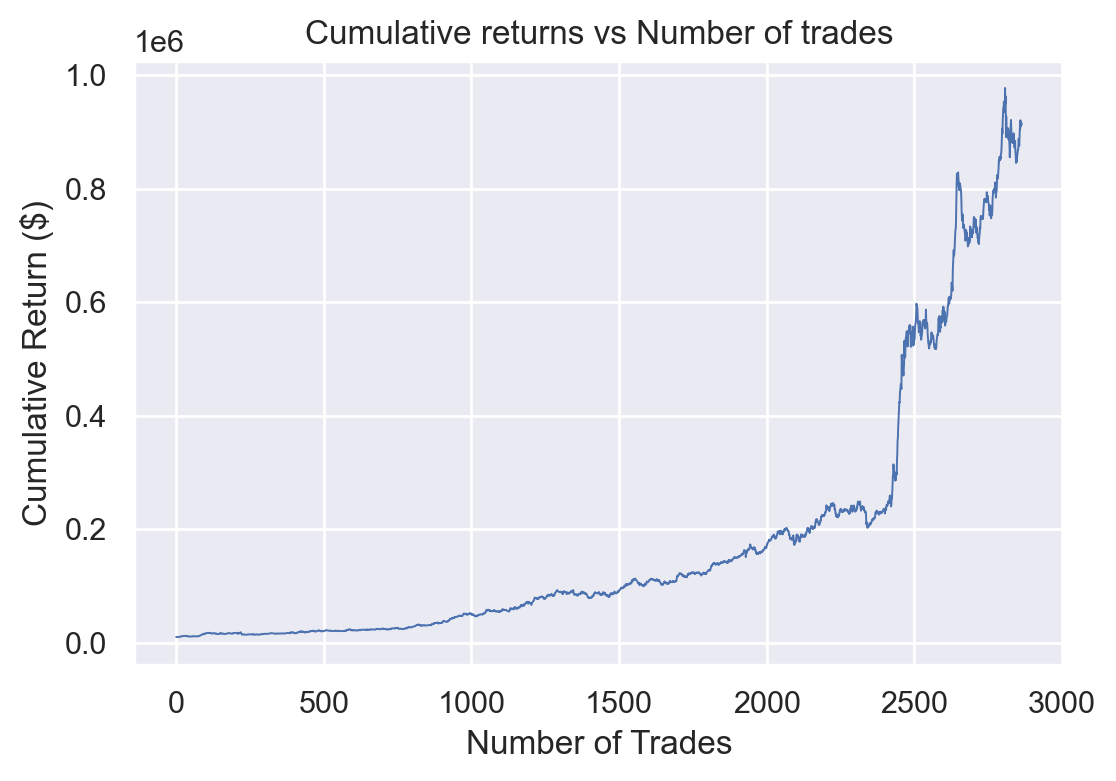

In [78]:
# Cumulative return of trend following strategy 
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})
axc=sns.lineplot(data=comp,lw=0.7);
axc.set(xlabel='Number of Trades',
       ylabel='Cumulative Return ($)',
       title='Cumulative returns vs Number of trades');

### CAGR- Compound Annual Growth Rate (Period: 2010-2022)

In [98]:
CAGR=((((((comp[-1])))/comp[0])**(1/12))-1)*100 # CAGR 
print(CAGR,'% per year')

45.36785477412353 % per year


### Total return on Capital Employed (%)

In [96]:
total_return_on_capital=((((comp[-1]-comp[0])))/comp[0])*100
print(total_return_on_capital,'%')

8804.726356176921 %


### Total return on Capital (usd) 

In [119]:
total_roc=comp[-1]
initial_investment=init_cap
print('Initial Investment:',initial_investment,'$','\nReturn on Investment:',total_roc,'$')

Initial Investment: 10000 $ 
Return on Investment: 913334.6807324338 $


In [120]:
date=array(price_dat1['Date'])
Comp_table=transpose(DataFrame([date,comp,price_dat1['TM NYSE close']]))
Comp_table.columns=['Date','Cumulative Return','Close price NYSE']
Comp_table=Comp_table.dropna()

In [121]:
scaler=MinMaxScaler()
scaled_dat_comp=scaler.fit(Comp_table.iloc[:,1:2])
transformed_dat_comp=scaler.transform(Comp_table.iloc[:,1:2])
scaled_dat_price=scaler.fit(Comp_table.iloc[:,2:3])
transformed_dat_price=scaler.transform(Comp_table.iloc[:,2:3])

In [122]:
axx=sns.lineplot(data=(transformed_dat_price),lw=0.8,palette=['#32a4a8'])# Closing price line plot- Green
ax1=sns.lineplot(data=transformed_dat_comp,lw=0.8,palette=['#c74870'])# Cumulative Return plot- Pink
axx.set(title='Close Price trend (TM NYSE) vs Cumulative return trend');
axx.legend(labels=['Close price']);
plt.show()
ax1.legend(labels=['Cumul Return']);
plt.show()